# 🔷 Taller — Hola Mundo Visual: Transformaciones Geométricas 2D
## Computación Visual · Semana 1

Este cuaderno explora los **tres pilares de las transformaciones geométricas**:

| Transformación | Descripción | Parámetros |
|---|---|---|
| **Traslación** | Mueve el objeto en el plano | $t_x, t_y$ |
| **Rotación** | Gira el objeto alrededor del origen | $\theta$ (radianes) |
| **Escala** | Cambia el tamaño del objeto | $s_x, s_y$ |

Todas se representan con **matrices homogéneas 3×3**, lo que permite **componer** varias transformaciones con una sola multiplicación de matrices:

$$P' = T \cdot R \cdot S \cdot P$$

La figura utilizada es un **cuadrado unitario** centrado en el origen.

## 1. Importar Librerías

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.backends.backend_agg import FigureCanvasAgg
import imageio.v2 as imageio
from IPython.display import Image, display
import io
import os

# Carpeta de salida para el GIF
OUTPUT_DIR = "output"
os.makedirs(OUTPUT_DIR, exist_ok=True)

print("✅ Librerías cargadas correctamente.")

✅ Librerías cargadas correctamente.


## 2. Figura Base: Cuadrado 2D en Coordenadas Homogéneas

Representamos el cuadrado como una matriz **3×N** donde cada columna es un punto $(x, y, 1)^T$.  
La coordenada extra `1` permite incluir la **traslación** dentro de la multiplicación de matrices.

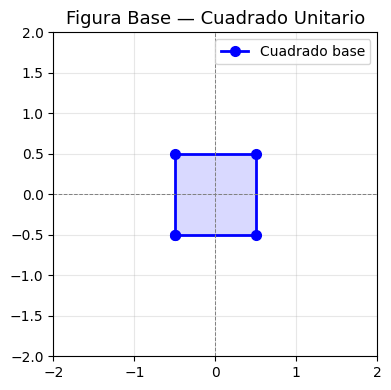

Matriz homogénea del cuadrado (3×5):
[[-0.5  0.5  0.5 -0.5 -0.5]
 [-0.5 -0.5  0.5  0.5 -0.5]
 [ 1.   1.   1.   1.   1. ]]


In [2]:
def make_square(size=1.0):
    """
    Retorna los vértices de un cuadrado centrado en el origen
    como matriz homogénea de shape (3, 5).
    El último punto repite el primero para cerrar el polígono.
    """
    h = size / 2
    # Vértices: esquina inf-izq → inf-der → sup-der → sup-izq → cierre
    vertices = np.array([
        [-h, -h],   # 0: inferior izquierdo
        [ h, -h],   # 1: inferior derecho
        [ h,  h],   # 2: superior derecho
        [-h,  h],   # 3: superior izquierdo
        [-h, -h],   # cierra el contorno
    ], dtype=float).T  # shape (2, 5)

    # Añadir fila de unos → coordenadas homogéneas (3, 5)
    ones = np.ones((1, vertices.shape[1]))
    return np.vstack([vertices, ones])


# ─── Visualización del cuadrado base ─────────────────────────────────────────
square = make_square(size=1.0)

fig, ax = plt.subplots(figsize=(4, 4))
ax.plot(square[0], square[1], 'b-o', linewidth=2, markersize=7, label='Cuadrado base')
ax.fill(square[0, :-1], square[1, :-1], alpha=0.15, color='blue')
ax.axhline(0, color='gray', linewidth=0.7, linestyle='--')
ax.axvline(0, color='gray', linewidth=0.7, linestyle='--')
ax.set_xlim(-2, 2); ax.set_ylim(-2, 2)
ax.set_aspect('equal'); ax.grid(True, alpha=0.3)
ax.set_title("Figura Base — Cuadrado Unitario", fontsize=13)
ax.legend()
plt.tight_layout()
plt.show()

print(f"Matriz homogénea del cuadrado (3×5):\n{square}")

## 3. Matrices de Transformación Homogéneas (3×3)

### Traslación $T(t_x, t_y)$
$$T = \begin{pmatrix} 1 & 0 & t_x \\ 0 & 1 & t_y \\ 0 & 0 & 1 \end{pmatrix}$$

### Rotación $R(\theta)$
$$R = \begin{pmatrix} \cos\theta & -\sin\theta & 0 \\ \sin\theta & \cos\theta & 0 \\ 0 & 0 & 1 \end{pmatrix}$$

### Escala $S(s_x, s_y)$
$$S = \begin{pmatrix} s_x & 0 & 0 \\ 0 & s_y & 0 \\ 0 & 0 & 1 \end{pmatrix}$$

### Transformación Compuesta
$$M = T \cdot R \cdot S$$
El orden importa: primero se escala, luego se rota, y finalmente se traslada.

In [3]:
def T(tx, ty):
    """Matriz de Traslación 3×3 (homogénea)."""
    return np.array([
        [1, 0, tx],
        [0, 1, ty],
        [0, 0,  1],
    ], dtype=float)

def R(theta):
    """Matriz de Rotación 3×3 (ángulo en radianes, sentido antihorario)."""
    c, s = np.cos(theta), np.sin(theta)
    return np.array([
        [ c, -s, 0],
        [ s,  c, 0],
        [ 0,  0, 1],
    ], dtype=float)

def S(sx, sy):
    """Matriz de Escala 3×3 (homogénea)."""
    return np.array([
        [sx,  0, 0],
        [ 0, sy, 0],
        [ 0,  0, 1],
    ], dtype=float)

def apply_transform(matrix, points):
    """Aplica una matriz homogénea 3×3 a una nube de puntos (3×N)."""
    return matrix @ points


# ─── Mostrar matrices de ejemplo ─────────────────────────────────────────────
print("T(2, 1):\n", T(2, 1))
print("\nR(45°):\n", np.round(R(np.radians(45)), 3))
print("\nS(2, 0.5):\n", S(2, 0.5))
print("\nCompuesta T·R·S:\n", np.round(T(2,1) @ R(np.radians(45)) @ S(2, 0.5), 3))

T(2, 1):
 [[1. 0. 2.]
 [0. 1. 1.]
 [0. 0. 1.]]

R(45°):
 [[ 0.707 -0.707  0.   ]
 [ 0.707  0.707  0.   ]
 [ 0.     0.     1.   ]]

S(2, 0.5):
 [[2.  0.  0. ]
 [0.  0.5 0. ]
 [0.  0.  1. ]]

Compuesta T·R·S:
 [[ 1.414 -0.354  2.   ]
 [ 1.414  0.354  1.   ]
 [ 0.     0.     1.   ]]


## 4. Transformaciones Estáticas

Aplicamos cada transformación de forma independiente y la combinación **T·R·S** al cuadrado base.

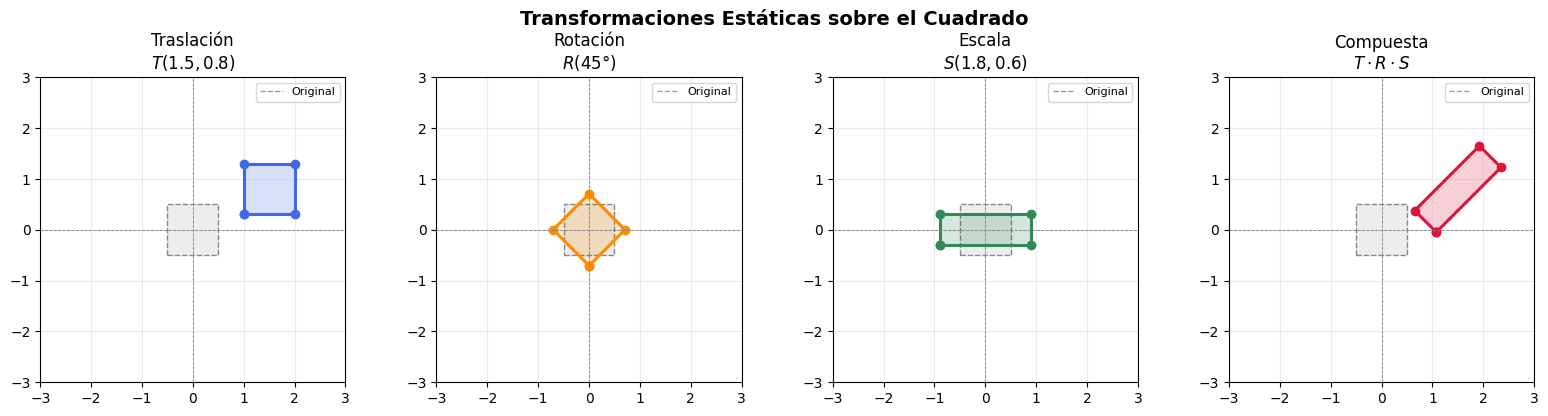

In [4]:
square = make_square(size=1.0)

# ── Parámetros de ejemplo ─────────────────────────────────────────────────────
tx, ty   = 1.5, 0.8          # traslación
theta    = np.radians(45)    # rotación 45°
sx, sy   = 1.8, 0.6          # escala no-uniforme

sq_T   = apply_transform(T(tx, ty),            square)   # solo traslación
sq_R   = apply_transform(R(theta),             square)   # solo rotación
sq_S   = apply_transform(S(sx, sy),            square)   # solo escala
sq_TRS = apply_transform(T(tx,ty)@R(theta)@S(sx,sy), square)   # compuesta

# ── Visualización ─────────────────────────────────────────────────────────────
fig, axes = plt.subplots(1, 4, figsize=(16, 4))
configs = [
    (sq_T,   "Traslación\n$T(1.5, 0.8)$",   'royalblue'),
    (sq_R,   "Rotación\n$R(45°)$",           'darkorange'),
    (sq_S,   "Escala\n$S(1.8, 0.6)$",        'seagreen'),
    (sq_TRS, "Compuesta\n$T \\cdot R \\cdot S$", 'crimson'),
]

for ax, (pts, title, color) in zip(axes, configs):
    # cuadrado original (referencia semitransparente)
    ax.plot(square[0], square[1], 'k--', linewidth=1, alpha=0.4, label='Original')
    ax.fill(square[0, :-1], square[1, :-1], alpha=0.07, color='black')
    # cuadrado transformado
    ax.plot(pts[0], pts[1], color=color, linewidth=2.2, marker='o', markersize=6)
    ax.fill(pts[0, :-1], pts[1, :-1], alpha=0.2, color=color)
    ax.axhline(0, color='gray', linewidth=0.6, linestyle='--')
    ax.axvline(0, color='gray', linewidth=0.6, linestyle='--')
    ax.set_xlim(-3, 3); ax.set_ylim(-3, 3)
    ax.set_aspect('equal'); ax.grid(True, alpha=0.25)
    ax.set_title(title, fontsize=12)
    ax.legend(fontsize=8)

plt.suptitle("Transformaciones Estáticas sobre el Cuadrado", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## 5. Animación de Transformaciones en Función del Tiempo

Definimos un parámetro $t \in [0, 1]$ que avanza a lo largo de `N_FRAMES` fotogramas.  
Para cada fotograma calculamos:

| Variable | Función de $t$ | Descripción |
|---|---|---|
| Traslación | $t_x = 2\cos(2\pi t),\ t_y = 2\sin(2\pi t)$ | Órbita circular |
| Rotación | $\theta = 2\pi t$ | Vuelta completa |
| Escala | $s = 0.5 + \sin^2(\pi t)$ | Pulso de tamaño |

La transformación compuesta en cada frame es $M(t) = T(t) \cdot R(t) \cdot S(t)$.

In [5]:
N_FRAMES = 60          # número de fotogramas
square   = make_square(size=1.0)
frames   = []          # lista de imágenes numpy para el GIF

for i in range(N_FRAMES):
    t = i / N_FRAMES   # t ∈ [0, 1)

    # ── Parámetros como función de t ──────────────────────────────────────────
    tx_t    =  2.0 * np.cos(2 * np.pi * t)          # órbita circular X
    ty_t    =  2.0 * np.sin(2 * np.pi * t)          # órbita circular Y
    theta_t =  2 * np.pi * t                         # rotación completa
    s_t     =  0.5 + np.sin(np.pi * t) ** 2         # escala pulsante [0.5, 1.5]

    # ── Matriz compuesta M = T · R · S ────────────────────────────────────────
    M_t = T(tx_t, ty_t) @ R(theta_t) @ S(s_t, s_t)
    sq_anim = apply_transform(M_t, square)

    # ── Dibujar frame ─────────────────────────────────────────────────────────
    fig, ax = plt.subplots(figsize=(5, 5), dpi=100)

    # Trayectoria de referencia (círculo)
    circle_t = np.linspace(0, 2 * np.pi, 200)
    ax.plot(2 * np.cos(circle_t), 2 * np.sin(circle_t),
            '--', color='lightgray', linewidth=1, zorder=0)

    # Cuadrado original (semitransparente)
    ax.fill(square[0, :-1], square[1, :-1], alpha=0.08, color='steelblue')
    ax.plot(square[0], square[1], 'b--', linewidth=1, alpha=0.3)

    # Cuadrado animado
    ax.fill(sq_anim[0, :-1], sq_anim[1, :-1], alpha=0.45, color='royalblue')
    ax.plot(sq_anim[0], sq_anim[1], 'b-o', linewidth=2, markersize=5)

    # Ejes y decoración
    ax.axhline(0, color='gray', linewidth=0.6, linestyle='--', alpha=0.5)
    ax.axvline(0, color='gray', linewidth=0.6, linestyle='--', alpha=0.5)
    ax.set_xlim(-3.8, 3.8); ax.set_ylim(-3.8, 3.8)
    ax.set_aspect('equal'); ax.grid(True, alpha=0.2)
    ax.set_title(
        f"Frame {i+1:02d}/{N_FRAMES} — t = {t:.2f}\n"
        f"tx={tx_t:.2f}, ty={ty_t:.2f}, θ={np.degrees(theta_t):.0f}°, s={s_t:.2f}",
        fontsize=10
    )

    # ── Capturar frame como array numpy ──────────────────────────────────────
    canvas = FigureCanvasAgg(fig)
    canvas.draw()
    buf = canvas.buffer_rgba()
    frame_img = np.asarray(buf)[..., :3]   # eliminar canal alpha para imageio
    frames.append(frame_img)
    plt.close(fig)

print(f"✅ {len(frames)} frames generados. Resolución: {frames[0].shape[1]}×{frames[0].shape[0]} px")

✅ 60 frames generados. Resolución: 500×500 px


## 6. Exportar Animación como GIF con `imageio`

Guardamos todos los frames capturados como un GIF animado y lo visualizamos directamente en el notebook.

✅ GIF guardado en: output\transformaciones_2D.gif


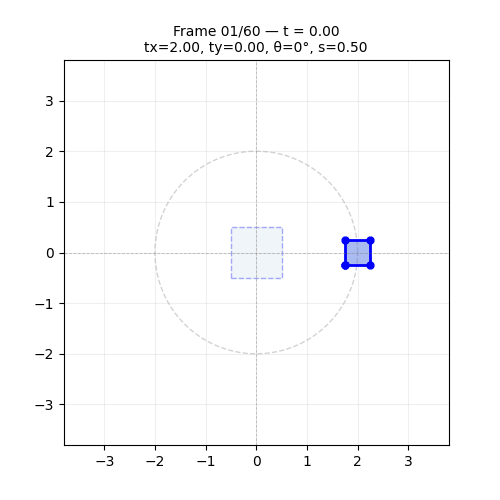

In [6]:
GIF_PATH = os.path.join(OUTPUT_DIR, "transformaciones_2D.gif")

# Exportar GIF (FPS = 20 → duración total ≈ 3 s)
imageio.mimsave(GIF_PATH, frames, fps=20, loop=0)
print(f"✅ GIF guardado en: {GIF_PATH}")

# ── Mostrar inline en el notebook ────────────────────────────────────────────
display(Image(filename=GIF_PATH, width=400))